# Analysis on CDKN2A Gene Therapy

### Presented By:QANY



## **Import datas and necessary library**

In [1]:
import pandas as pd
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from ipywidgets import interact, IntSlider
import time
from IPython.display import clear_output
import ipywidgets as widgets
import networkx as nx

articles = pd.read_csv("articles.CDKN2A.csv")
authors = pd.read_csv("authors.CDKN2A.csv")
paper = pd.read_csv("paper_counts.csv")


## **Top 10 Active Researchers over the years**

In [2]:
# Merge the 'articles' and 'authors' dataframes on 'PMID'
merged_all = pd.merge(articles, authors, on='PMID')

# Concatenate 'AuthorLastname' and 'AuthorForename' to create a full author name
merged_all['FullAuthorName'] = merged_all['AuthorLastname'] + ', ' + merged_all['AuthorForename']

# Count occurrences of each author across all years
author_counts_df = merged_all['FullAuthorName'].value_counts().reset_index()
author_counts_df.columns = ['Author', 'Count']

# Sort the dataframe by count in descending order
author_counts_df = author_counts_df.sort_values(by='Count', ascending=False)

# Extract the top 10 active researchers
top_10_active_researchers = author_counts_df.head(10)

#Print the top 10 active researchers
print(top_10_active_researchers)


                Author  Count
0   Goldstein, Alisa M     50
1   Tucker, Margaret A     38
2  Hayward, Nicholas K     37
3       Ghiorzo, Paola     36
4      Hruban, Ralph H     31
5    Bishop, D Timothy     28
6     Fuchs, Charles S     27
7        Harland, Mark     27
8         Ogino, Shuji     26
9       Mann, Graham J     26


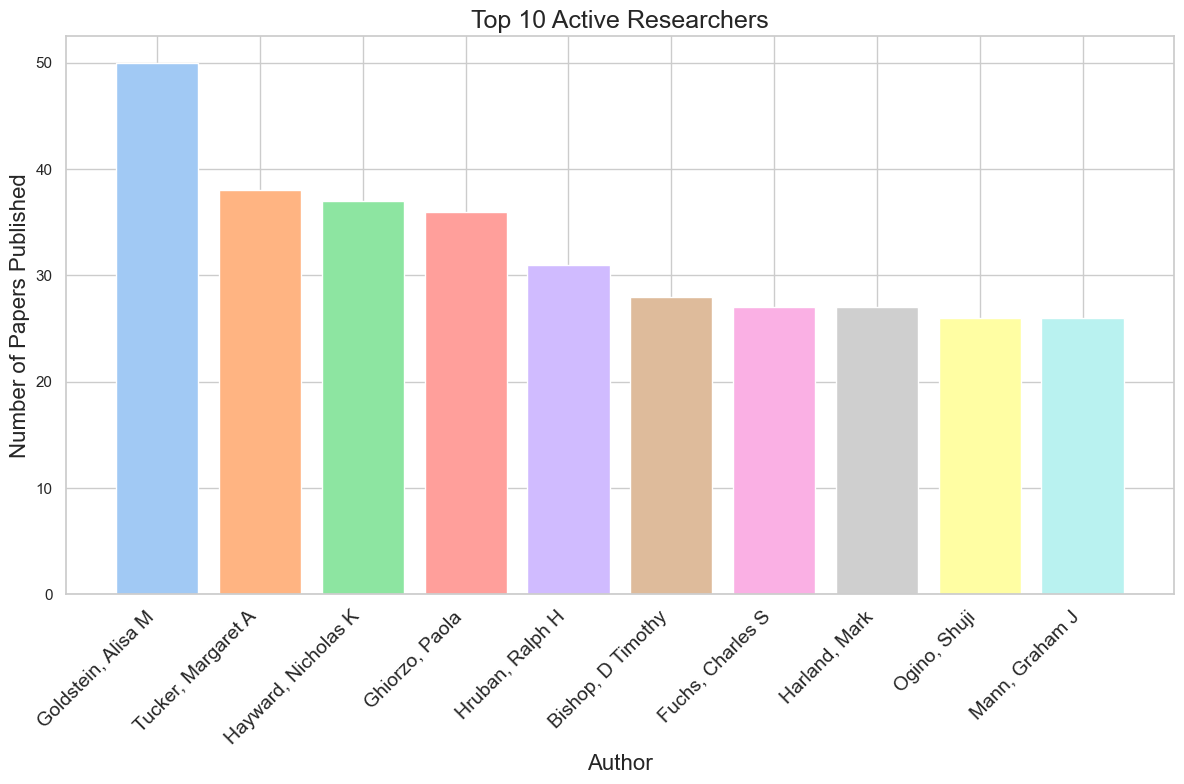

In [73]:
import seaborn as sns

sns.set(style="whitegrid") #Define the grid of the graph

plt.figure(figsize=(12, 8)) #Size of the graph
colors = sns.color_palette("pastel")  #Define the palette of the graph

plt.bar(top_10_active_researchers['Author'], top_10_active_researchers['Count'], color=colors) #Parameters of the graph

plt.xlabel('Author', fontsize=16) #Label the x-axis and font-size
plt.ylabel('Number of Papers Published', fontsize=16) #Label the y-axis and font-size
plt.title('Top 10 Active Researchers', fontsize=18) #Label the title of the graph and font size

plt.xticks(rotation=45, ha='right', fontsize=14) # Rotating x-axis labels for better readability

plt.tight_layout() #Define the layout

plt.show() #Display the plot



## **Top researchers who were actively working the last 5 years**

In [34]:
#Articles published in the last 5 years
current_year=2024

last_5_years_paper= articles[articles['Year'] >= current_year -5]
last_5_years_paper

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
2136,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori..."
2231,29489509,The Amount of Melanin Influences p16 Loss in S...,The risk assessment of spitzoid lesions is one...,1533-4058,Applied immunohistochemistry & molecular morph...,(27) 423-429,2019,Carolina,Martinez Ciarpaglini,C,Biomedical Research Institute INCLIVA.
2284,29915929,Identification of miR-146a is Associated with ...,There is emerging evidence that some microRNAs...,1532-2807,Pathology oncology research : POR,(26) 245-251,2020,Yanping,Zhang,Y,"Department of Clinical Medicine, Changde Vocat..."
2298,29966470,Deletion of CDKN2A/B is associated with inferi...,Considering conflicting data on CDKN2A/B delet...,1029-2403,Leukemia & lymphoma,(60) 433-441,2019,M,Kathiravan,M,"a Paediatric Haematology-Oncology Unit , Post ..."
2306,30009659,Primary Esophageal Mixed Sarcomatoid and Small...,Mixed carcinomas in the esophagus are highly u...,1940-2465,International journal of surgical pathology,(27) 84-88,2019,Christopher J,Schwartz,CJ,"1 New York University Medical Center, New York..."
...,...,...,...,...,...,...,...,...,...,...,...
3409,38067238,Validation of a Gene Expression Approach for t...,Cytological diagnosis of pleural mesothelioma ...,2072-6694,Cancers,5534,2023,Rossella,Bruno,R,"Unit of Pathological Anatomy, University Hospi..."
3410,38070141,Has-miR-300-GADD45B promotes melanoma growth v...,"Response to oncogenic factors like UV, GADD45 ...",1945-4589,Aging,10.18632/aging.205276,2023,Long,Chen,L,"Department of Burn Plastic and Cosmetology, Af..."
3411,38079020,"""De novo replication repair deficient glioblas...",Glioblastoma is a clinically and molecularly h...,1432-0533,Acta neuropathologica,(147) 3,2023,Sara,Hadad,S,"Department of Neurological Surgery, University..."
3412,38091828,Dry and wet experiments reveal diagnostic clus...,Cuproptosis is a new manner of mitochondrial c...,1878-1705,International immunopharmacology,(127) 111326,2023,Peng,Zhang,P,"The Second Clinical Medical School, Guangzhou ..."


In [23]:
#Extract the authors of those papers

last_5_year_authors= pd.merge(last_5_years_paper, authors, on='PMID', how='inner')
last_5_year_authors

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",1,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori..."
1,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",2,François,Audenet,F,"Urology Service, Department of Surgery, Memori..."
2,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",3,Esther,Drill,E,"Department of Epidemiology and Biostatistics, ..."
3,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",4,Eugene J,Pietzak,EJ,"Urology Service, Department of Surgery, Memori..."
4,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",5,Gopa,Iyer,G,"Genitourinary Oncology Service, Department of ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11713,38095311,Compliant substrates mitigate the senescence a...,Mesenchymal stromal cells (MSCs) are a promisi...,1552-4965,Journal of biomedical materials research. Part A,10.1002/jbm.a.37657,2023,Robert C H,Gresham,RCH,"Department of Orthopaedic Surgery, School of M...",4,Molly,Czachor,M,Center for Regenerative and Personalized Medic...
11714,38095311,Compliant substrates mitigate the senescence a...,Mesenchymal stromal cells (MSCs) are a promisi...,1552-4965,Journal of biomedical materials research. Part A,10.1002/jbm.a.37657,2023,Robert C H,Gresham,RCH,"Department of Orthopaedic Surgery, School of M...",5,Natalie,Schmier,N,"Department of Orthopaedic Surgery, School of M..."
11715,38095311,Compliant substrates mitigate the senescence a...,Mesenchymal stromal cells (MSCs) are a promisi...,1552-4965,Journal of biomedical materials research. Part A,10.1002/jbm.a.37657,2023,Robert C H,Gresham,RCH,"Department of Orthopaedic Surgery, School of M...",6,Claire,Pearson,C,"Department of Orthopaedic Surgery, School of M..."
11716,38095311,Compliant substrates mitigate the senescence a...,Mesenchymal stromal cells (MSCs) are a promisi...,1552-4965,Journal of biomedical materials research. Part A,10.1002/jbm.a.37657,2023,Robert C H,Gresham,RCH,"Department of Orthopaedic Surgery, School of M...",7,Chelsea,Bahney,C,Center for Regenerative and Personalized Medic...


In [24]:
#Determine the unique active researchers

unique_active_researchers= last_5_year_authors[['AuthorForename','AuthorLastname', 'AuthorInitials','AuthorAffiliation']].drop_duplicates()
unique_active_researchers

,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori..."
1,François,Audenet,F,"Urology Service, Department of Surgery, Memori..."
2,Esther,Drill,E,"Department of Epidemiology and Biostatistics, ..."
3,Eugene J,Pietzak,EJ,"Urology Service, Department of Surgery, Memori..."
4,Gopa,Iyer,G,"Genitourinary Oncology Service, Department of ..."
...,...,...,...,...
11713,Molly,Czachor,M,Center for Regenerative and Personalized Medic...
11714,Natalie,Schmier,N,"Department of Orthopaedic Surgery, School of M..."
11715,Claire,Pearson,C,"Department of Orthopaedic Surgery, School of M..."
11716,Chelsea,Bahney,C,Center for Regenerative and Personalized Medic...


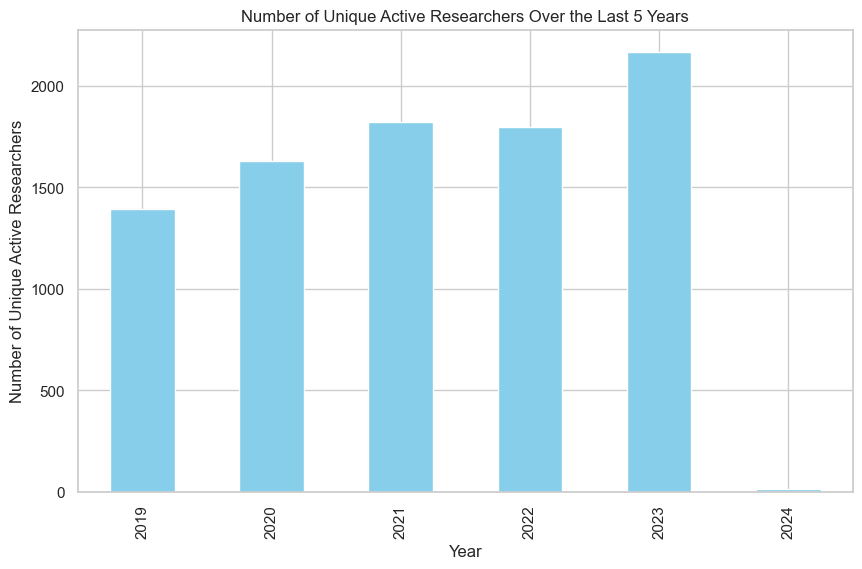

In [70]:
#Plot the bar graph for Number of Unique Active Researchers over the last 5 years

# Count the number of unique active researchers for each year
researcher_counts = last_5_year_authors.groupby('Year')['AuthorLastname'].nunique()

plt.figure(figsize=(10, 6)) #Define the size of the figure
researcher_counts.plot(kind='bar', color='skyblue') #Define the bar plot
plt.xlabel('Year') #Label the x-axis 
plt.ylabel('Number of Unique Active Researchers') #Label the y-axis
plt.title('Number of Unique Active Researchers Over the Last 5 Years') #Label the title of the plot
plt.show() #Display the graph

In [37]:
#Extract the first authors for last 5 years
student_papers=last_5_year_authors[(last_5_year_authors['AuthorN']==1)]
student_papers

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Fullname
0,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",1,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",Sumit Isharwal
19,29489509,The Amount of Melanin Influences p16 Loss in S...,The risk assessment of spitzoid lesions is one...,1533-4058,Applied immunohistochemistry & molecular morph...,(27) 423-429,2019,Carolina,Martinez Ciarpaglini,C,Biomedical Research Institute INCLIVA.,1,Carolina,Martinez Ciarpaglini,C,Biomedical Research Institute INCLIVA.,Carolina Martinez Ciarpaglini
26,29915929,Identification of miR-146a is Associated with ...,There is emerging evidence that some microRNAs...,1532-2807,Pathology oncology research : POR,(26) 245-251,2020,Yanping,Zhang,Y,"Department of Clinical Medicine, Changde Vocat...",1,Yanping,Zhang,Y,"Department of Clinical Medicine, Changde Vocat...",Yanping Zhang
31,29966470,Deletion of CDKN2A/B is associated with inferi...,Considering conflicting data on CDKN2A/B delet...,1029-2403,Leukemia & lymphoma,(60) 433-441,2019,M,Kathiravan,M,"a Paediatric Haematology-Oncology Unit , Post ...",1,M,Kathiravan,M,"a Paediatric Haematology-Oncology Unit , Post ...",M Kathiravan
40,30009659,Primary Esophageal Mixed Sarcomatoid and Small...,Mixed carcinomas in the esophagus are highly u...,1940-2465,International journal of surgical pathology,(27) 84-88,2019,Christopher J,Schwartz,CJ,"1 New York University Medical Center, New York...",1,Christopher J,Schwartz,CJ,"1 New York University Medical Center, New York...",Christopher J Schwartz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11646,38067238,Validation of a Gene Expression Approach for t...,Cytological diagnosis of pleural mesothelioma ...,2072-6694,Cancers,5534,2023,Rossella,Bruno,R,"Unit of Pathological Anatomy, University Hospi...",1,Rossella,Bruno,R,"Unit of Pathological Anatomy, University Hospi...",Rossella Bruno
11653,38070141,Has-miR-300-GADD45B promotes melanoma growth v...,"Response to oncogenic factors like UV, GADD45 ...",1945-4589,Aging,10.18632/aging.205276,2023,Long,Chen,L,"Department of Burn Plastic and Cosmetology, Af...",1,Long,Chen,L,"Department of Burn Plastic and Cosmetology, Af...",Long Chen
11660,38079020,"""De novo replication repair deficient glioblas...",Glioblastoma is a clinically and molecularly h...,1432-0533,Acta neuropathologica,(147) 3,2023,Sara,Hadad,S,"Department of Neurological Surgery, University...",1,Sara,Hadad,S,"Department of Neurological Surgery, University...",Sara Hadad
11690,38091828,Dry and wet experiments reveal diagnostic clus...,Cuproptosis is a new manner of mitochondrial c...,1878-1705,International immunopharmacology,(127) 111326,2023,Peng,Zhang,P,"The Second Clinical Medical School, Guangzhou ...",1,Peng,Zhang,P,"The Second Clinical Medical School, Guangzhou ...",Peng Zhang


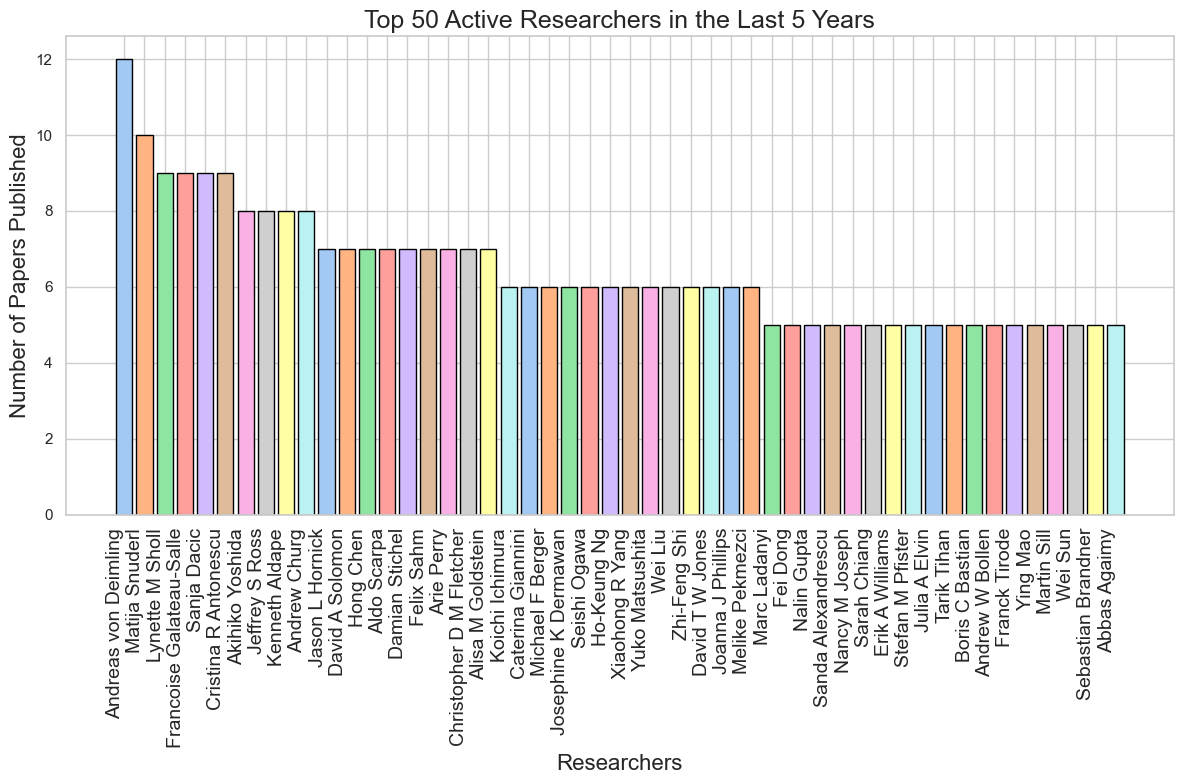

In [71]:
#Plot a bar graph for Top 50 Active Researchers in the Last 5 years

# Combine first and last names for each researcher
last_5_year_authors['Fullname'] = last_5_year_authors['AuthorForename'] + ' ' + last_5_year_authors['AuthorLastname']

# Count the number of papers published by each researcher
researcher_paper_counts = last_5_year_authors['Fullname'].value_counts()

# Select the top N researchers
top_n = 50
top_researchers = researcher_paper_counts.head(top_n)

sns.set(style="whitegrid") #Set the grid of the graph

plt.figure(figsize=(12, 8)) #Define the size of the figure
colors = sns.color_palette("pastel") #Define the colour palette for the graph

plt.bar(top_researchers.index, top_researchers, color=colors, edgecolor='black') # Use a horizontal bar chart with a different color for each bar

plt.xlabel('Researchers', fontsize=16) #Label the x-axis and font size
plt.ylabel('Number of Papers Published', fontsize=16) #Label the y-axis and font size
plt.title(f'Top {top_n} Active Researchers in the Last 5 Years', fontsize=18) #Label the title of the graph

plt.xticks(rotation=90, ha='right', fontsize=14) # Rotating x-axis labels for better readability

plt.tight_layout() #Display the layout of the graph

plt.show() # Display the plot

C:\Users\HP\AppData\Local\Temp\ipykernel_27600\4015527867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_papers['Fullname'] = student_papers['AuthorForename'] + ' ' + student_papers['AuthorLastname']


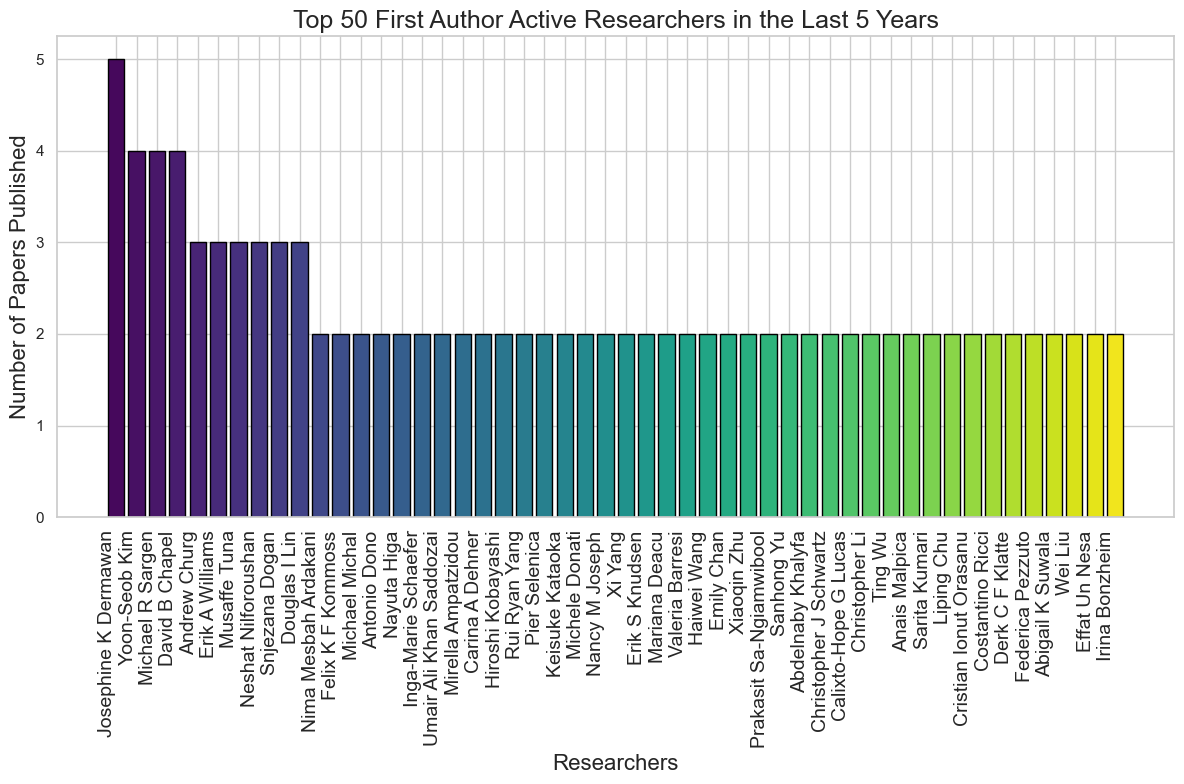

In [72]:
#Plot the bar graph for Top 50 First Author Active Researchers in the Last 5 years

# Combine first and last names for each researcher
student_papers['Fullname'] = student_papers['AuthorForename'] + ' ' + student_papers['AuthorLastname']

# Count the number of papers published by each researcher
researcher_paper_counts = student_papers['Fullname'].value_counts()

# Select the top N researchers
top_n = 50
top_researchers = researcher_paper_counts.head(top_n)

sns.set(style="whitegrid") #Set the grid of the graph

plt.figure(figsize=(12, 8)) #Size of the graph
colors = sns.color_palette("viridis", len(top_researchers)) 

plt.bar(top_researchers.index, top_researchers, color=colors, edgecolor='black') #Define the parameters of the graph

# Adding labels and title with larger font sizes
plt.xlabel('Researchers', fontsize=16) #Label the x-axis and the font size
plt.ylabel('Number of Papers Published', fontsize=16) #Label the y-axis and the font size
plt.title(f'Top {top_n} First Author Active Researchers in the Last 5 Years', fontsize=18) #Label the title of the graph

plt.xticks(rotation=90, ha='right', fontsize=14) # Rotating x-axis labels for better readability

plt.tight_layout() #Define the layout of the graph

plt.show() # Display the plot

In [43]:
#Extract the list of 5th Authors and considering them as Supervisors
supervisors=last_5_year_authors[(last_5_year_authors['AuthorN']==5)]
supervisors

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,Fullname
4,28802642,"Prognostic Value of TERT Alterations, Mutation...",Point mutations in the TERT gene promoter occu...,2405-4569,European urology focus,(5) 201-204,2019,Sumit,Isharwal,S,"Urology Service, Department of Surgery, Memori...",5,Gopa,Iyer,G,"Genitourinary Oncology Service, Department of ...",Gopa Iyer
23,29489509,The Amount of Melanin Influences p16 Loss in S...,The risk assessment of spitzoid lesions is one...,1533-4058,Applied immunohistochemistry & molecular morph...,(27) 423-429,2019,Carolina,Martinez Ciarpaglini,C,Biomedical Research Institute INCLIVA.,5,Lara,Navarro,L,Biomedical Research Institute INCLIVA.,Lara Navarro
30,29915929,Identification of miR-146a is Associated with ...,There is emerging evidence that some microRNAs...,1532-2807,Pathology oncology research : POR,(26) 245-251,2020,Yanping,Zhang,Y,"Department of Clinical Medicine, Changde Vocat...",5,Weilin,Huang,W,"Department of Clinical Medicine, Changde Vocat...",Weilin Huang
35,29966470,Deletion of CDKN2A/B is associated with inferi...,Considering conflicting data on CDKN2A/B delet...,1029-2403,Leukemia & lymphoma,(60) 433-441,2019,M,Kathiravan,M,"a Paediatric Haematology-Oncology Unit , Post ...",5,Neelam,Varma,N,"b Department of Haematology , Post Graduate In...",Neelam Varma
44,30009659,Primary Esophageal Mixed Sarcomatoid and Small...,Mixed carcinomas in the esophagus are highly u...,1940-2465,International journal of surgical pathology,(27) 84-88,2019,Christopher J,Schwartz,CJ,"1 New York University Medical Center, New York...",5,Esther,Adler,E,"1 New York University Medical Center, New York...",Esther Adler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11650,38067238,Validation of a Gene Expression Approach for t...,Cytological diagnosis of pleural mesothelioma ...,2072-6694,Cancers,5534,2023,Rossella,Bruno,R,"Unit of Pathological Anatomy, University Hospi...",5,Alessandro,Ribechini,A,"Endoscopic Section of Pneumology, University H...",Alessandro Ribechini
11657,38070141,Has-miR-300-GADD45B promotes melanoma growth v...,"Response to oncogenic factors like UV, GADD45 ...",1945-4589,Aging,10.18632/aging.205276,2023,Long,Chen,L,"Department of Burn Plastic and Cosmetology, Af...",5,Ping,Wu,P,"Department of Burn Plastic and Cosmetology, Af...",Ping Wu
11664,38079020,"""De novo replication repair deficient glioblas...",Glioblastoma is a clinically and molecularly h...,1432-0533,Acta neuropathologica,(147) 3,2023,Sara,Hadad,S,"Department of Neurological Surgery, University...",5,Javier E,Villanueva-Meyer,JE,Department of Radiology and Biomedical Imaging...,Javier E Villanueva-Meyer
11694,38091828,Dry and wet experiments reveal diagnostic clus...,Cuproptosis is a new manner of mitochondrial c...,1878-1705,International immunopharmacology,(127) 111326,2023,Peng,Zhang,P,"The Second Clinical Medical School, Guangzhou ...",5,Guangye,Zhu,G,Suzhou TCM Hospital Affiliated to Nanjing Univ...,Guangye Zhu


C:\Users\HP\AppData\Local\Temp\ipykernel_27600\2450863489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supervisors['Fullname'] = supervisors['AuthorForename'] + ' ' + supervisors['AuthorLastname']


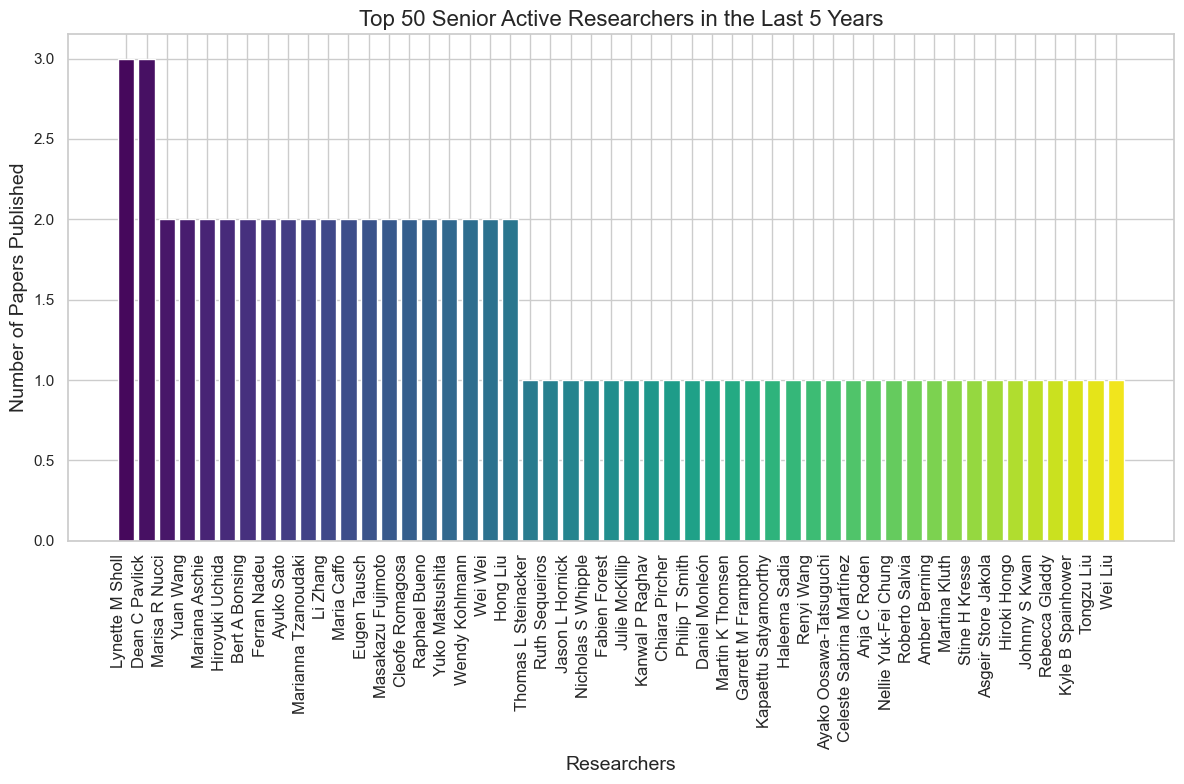

In [66]:
# Combine first and last names for each researcher
supervisors['Fullname'] = supervisors['AuthorForename'] + ' ' + supervisors['AuthorLastname']

# Count the number of papers published by each researcher
researcher_paper_counts = supervisors['Fullname'].value_counts()

# Select the top N researchers
top_n = 50
top_researchers = researcher_paper_counts.head(top_n)

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid") #Grid of the graph

# Create a vertical bar chart
plt.figure(figsize=(12, 8)) #Size of the figure
colors = sns.color_palette("viridis", len(top_researchers))  #Define the color palette

plt.bar(top_researchers.index, top_researchers, color=colors) #Define the parameters of the graph

plt.xlabel("Researchers", fontsize=14)  # Label the x-axis with font size
plt.ylabel("Number of Papers Published", fontsize=14)  # Label the y-axis with font size
plt.title(f"Top {top_n} Senior Active Researchers in the Last 5 Years", fontsize=16) #Label the title of the graph

plt.xticks(rotation=90, ha='right', fontsize=12) #Rotating x-axis labels for better readability

# plt.legend() #Add a legend

plt.tight_layout() #Display the layout of the graph
plt.show() # Display the plot


## **Cooperative and competitive relationships between active researchers.**

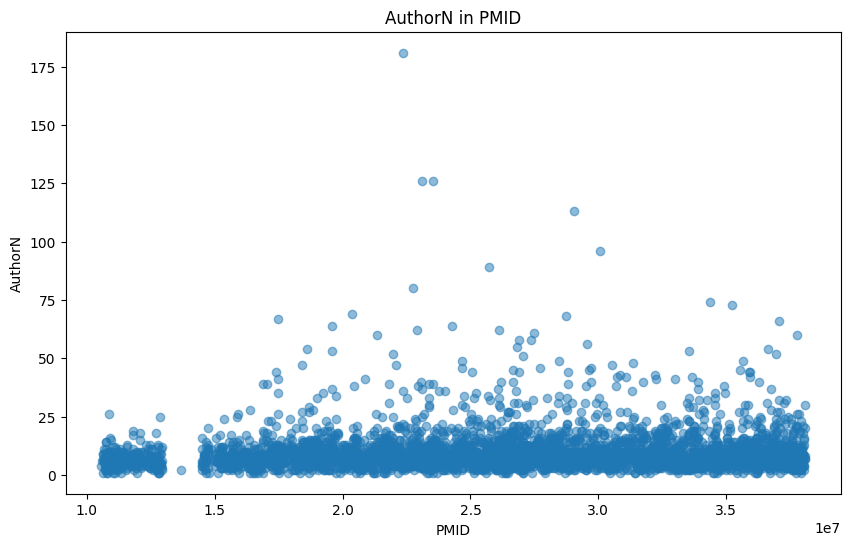

<ipython-input-4-7afa2e58604c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_authors_data['Author Full Name'] =cleaned_authors_data['AuthorForename'] + ' ' + cleaned_authors_data['AuthorLastname']
<ipython-input-4-7afa2e58604c>:69: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-4-7afa2e58604c>:69: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
<ipython-input-4-7afa2e58604c>:69: FutureWarning: Passing a set

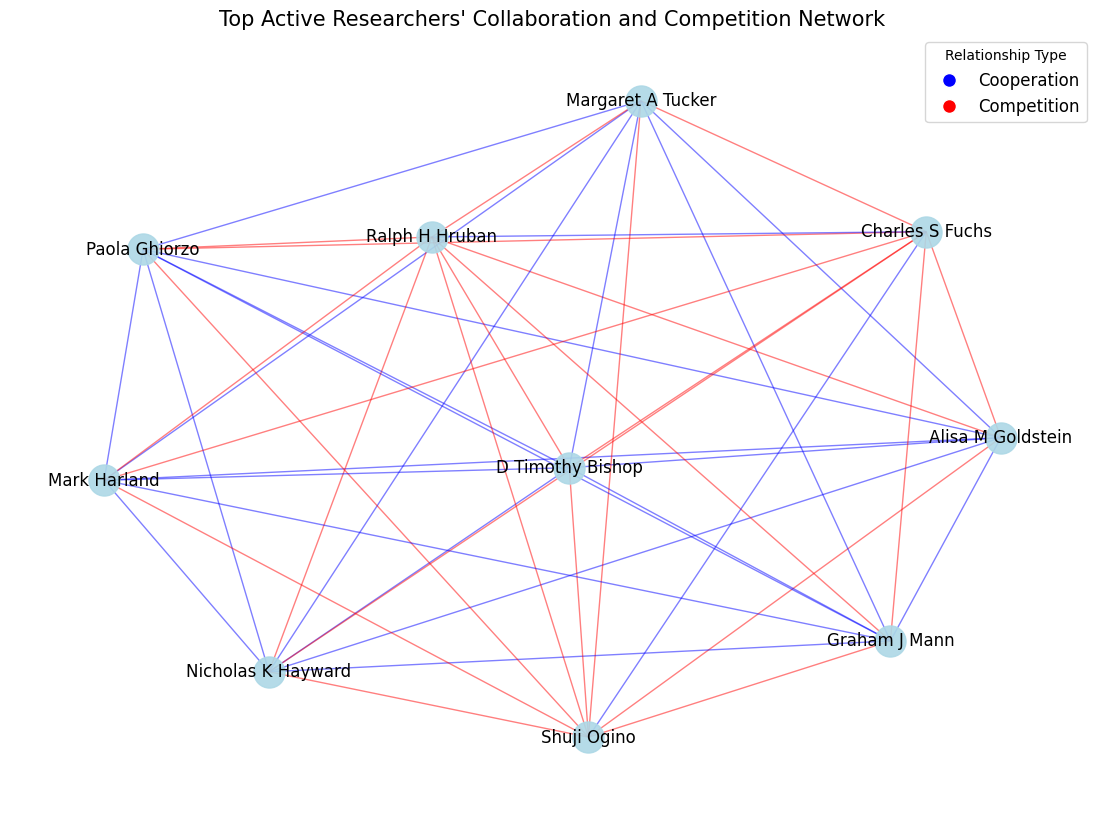

In [4]:
#cleaning data


#scatter to show the author number
result = authors.groupby('PMID')['AuthorN'].agg('max')
result_data = result.reset_index()
#Make scatter plots
x = result_data['PMID']
y = result_data['AuthorN']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('AuthorN in PMID')
plt.xlabel('PMID')
plt.ylabel('AuthorN')
plt.show()

# Calculate the number of authors per article (PMID)
author_counts_per_paper = authors.groupby('PMID').size()

# Find the PMID of articles with more than 25 authors
papers_with_many_authors = author_counts_per_paper[author_counts_per_paper > 25].index

# Clear from the data
cleaned_authors_data = authors[~authors['PMID'].isin(papers_with_many_authors)]

# Check the maximum AuthorN value in the cleared data
max_author_n_after_cleaning = cleaned_authors_data['AuthorN'].max()

cleaned_authors_data['Author Full Name'] =cleaned_authors_data['AuthorForename'] + ' ' + cleaned_authors_data['AuthorLastname']


#Make the relationship network
authors['Author Full Name'] = authors['AuthorForename'] + ' ' + authors['AuthorLastname']

# Count the number of times all authors appear
all_author_counts = authors['Author Full Name'].value_counts()

# Get the top 10 most active researchers
top_10_active_researchers = all_author_counts.head(10).index.tolist()

# Sift through the data for the top 10 most active researchers
top_authors_df = cleaned_authors_data[cleaned_authors_data['Author Full Name'].isin(top_10_active_researchers)]

# Create a new diagram
G_top = nx.Graph()

# Add node
G_top.add_nodes_from(top_10_active_researchers)

# Add a partnership edge
for _, group in top_authors_df.groupby('PMID'):
    authors = group['Author Full Name'].tolist()
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G_top.add_edge(authors[i], authors[j], color='blue')  # 合作关系

# Identify the last author
last_authors = cleaned_authors_data.groupby('PMID').last()['Author Full Name']

# Adds a competitive edge
for i in range(len(top_10_active_researchers)):
    for j in range(i + 1, len(top_10_active_researchers)):
        author1 = top_10_active_researchers[i]
        author2 = top_10_active_researchers[j]
        if not G_top.has_edge(author1, author2):
            papers_author1 = set(cleaned_authors_data[cleaned_authors_data['Author Full Name'] == author1]['PMID'])
            papers_author2 = set(cleaned_authors_data[cleaned_authors_data['Author Full Name'] == author2]['PMID'])
            # uses the intersection operator & to determine if there is a common last author
            common_last_authors = set(last_authors[papers_author1]) & set(last_authors[papers_author2])
            if not common_last_authors:
                G_top.add_edge(author1, author2, color='red')


# Visual network diagram
edge_colors = nx.get_edge_attributes(G_top, 'color').values()

plt.figure(figsize=(14, 10))
# Use spring layout
pos = nx.spring_layout(G_top)
nx.draw_networkx_nodes(G_top, pos, node_color='lightblue', node_size=500, alpha=0.9)
nx.draw_networkx_edges(G_top, pos, edge_color=edge_colors, alpha=0.5)
nx.draw_networkx_labels(G_top, pos, font_size=12, font_family="sans-serif")
legend_labels = {'Cooperation': 'blue', 'Competition': 'red'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, markersize=10, markerfacecolor=value) for key, value in legend_labels.items()]
plt.legend(handles=legend_handles, title='Relationship Type', loc='upper right', fontsize=12)
plt.title("Top Active Researchers' Collaboration and Competition Network", fontsize=15)
plt.axis('off')
plt.show()


**Number of CDKN2A papers and percentage in PubMed.**

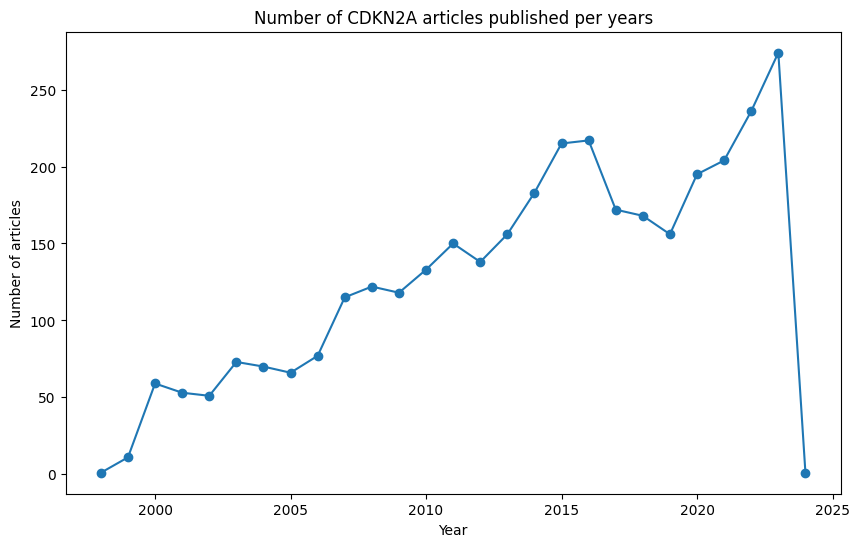

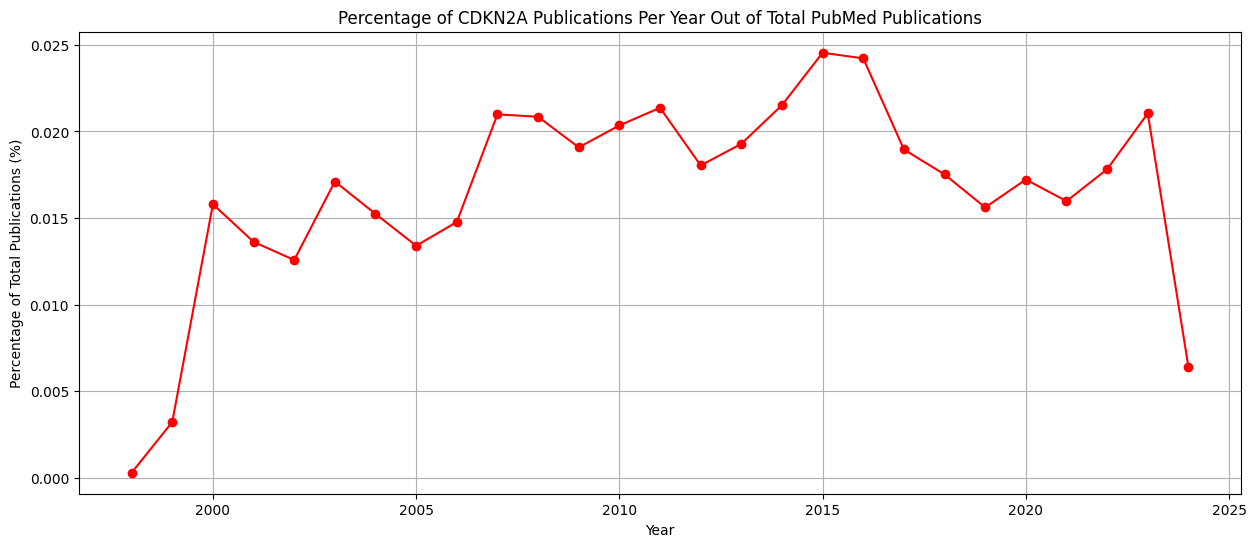

In [6]:
#Number of CDKN2A papers
articles_counts = articles['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(articles_counts.index,articles_counts.values, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Number of articles")
plt.title("Number of CDKN2A articles published per years")

#Percentage in PubMed

# Rename the column in paper_counts_data for clarity
paper.rename(columns={'Count': 'TotalPapers'}, inplace=True)

# Count the number of CDKN2A articles per year
CDKN2A = articles.groupby('Year').size().reset_index(name='CDKN2ACount')

# Merge the CDKN2A per year with total paper counts per year
merged_data = pd.merge(CDKN2A, paper, on='Year')

# Calculate the percentage of CDKN2A publications out of total publications per year
merged_data['CDKN2APercentage'] = (merged_data['CDKN2ACount'] / merged_data['TotalPapers']) * 100

# Plotting the percentage trend
plt.figure(figsize=(15, 6))
plt.plot(merged_data['Year'], merged_data['CDKN2APercentage'], marker='o', color='red')
plt.title('Percentage of CDKN2A Publications Per Year Out of Total PubMed Publications')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Publications (%)')
plt.grid(True)
plt.show()

## **Display the number of journals based on the first author and publication count.**

In [4]:
pd.set_option('display.max_colwidth', 100)

# Filtering for only first authors in the 'authors' dataframe
first_authors = authors[authors['AuthorN'] == 1]

# Count the number of articles for each first author
first_author_article_counts = first_authors['AuthorLastname'].value_counts()

# Select the top 20 most active first authors
top_20_first_authors = first_author_article_counts.head(20)

# Merge 'articles' dataframe with 'first_authors' dataframe
merged_first_authors = pd.merge(first_authors, articles, on='PMID')

# Filter the merged dataframe for only the top 20 first authors
top_20_first_authors_articles = merged_first_authors[merged_first_authors['AuthorLastname'].isin(top_20_first_authors.index)]

# For each of the top 20 first authors, find the journal they have published in most frequently
top_journal_per_author = top_20_first_authors_articles.groupby('AuthorLastname')['Journal'].agg(lambda x: x.value_counts().index[0])

# Combine with the count of publications in that journal
top_journal_per_author_count = top_20_first_authors_articles.groupby(['AuthorLastname', 'Journal']).size().reset_index(name='Count')
top_journal_per_author_with_count = top_journal_per_author_count.loc[top_journal_per_author_count.groupby('AuthorLastname')['Count'].idxmax()]

# Formatting the results
formatted_top_journals_per_author = top_journal_per_author_with_count.apply(lambda x: f"{x['AuthorLastname']}: {x['Journal']} ({x['Count']})", axis=1)
formatted_top_journals_per_author.reset_index(drop=True, inplace=True)

# Displaying the formatted results
print(formatted_top_journals_per_author)

0                           Chen: Genes, chromosomes & cancer (2)
1                   Cheng: American journal of human genetics (1)
2                                         Gao: Carcinogenesis (1)
3                      Goldstein: Journal of medical genetics (3)
4                                 Hu: Brain research bulletin (1)
5                 Huang: Breast cancer research and treatment (1)
6          Jiang: Bioscience, biotechnology, and biochemistry (1)
7                                               Kim: PloS one (3)
8                                     Lee: Scientific reports (3)
9     Li: Biochemical and biophysical research communications (2)
10                                               Liu: Cancers (2)
11                                     Lynch: Familial cancer (3)
12                                     Ogino: Human pathology (3)
13                                      Wang: Cancer medicine (2)
14                                  Wu: Frontiers in oncology (2)
15        

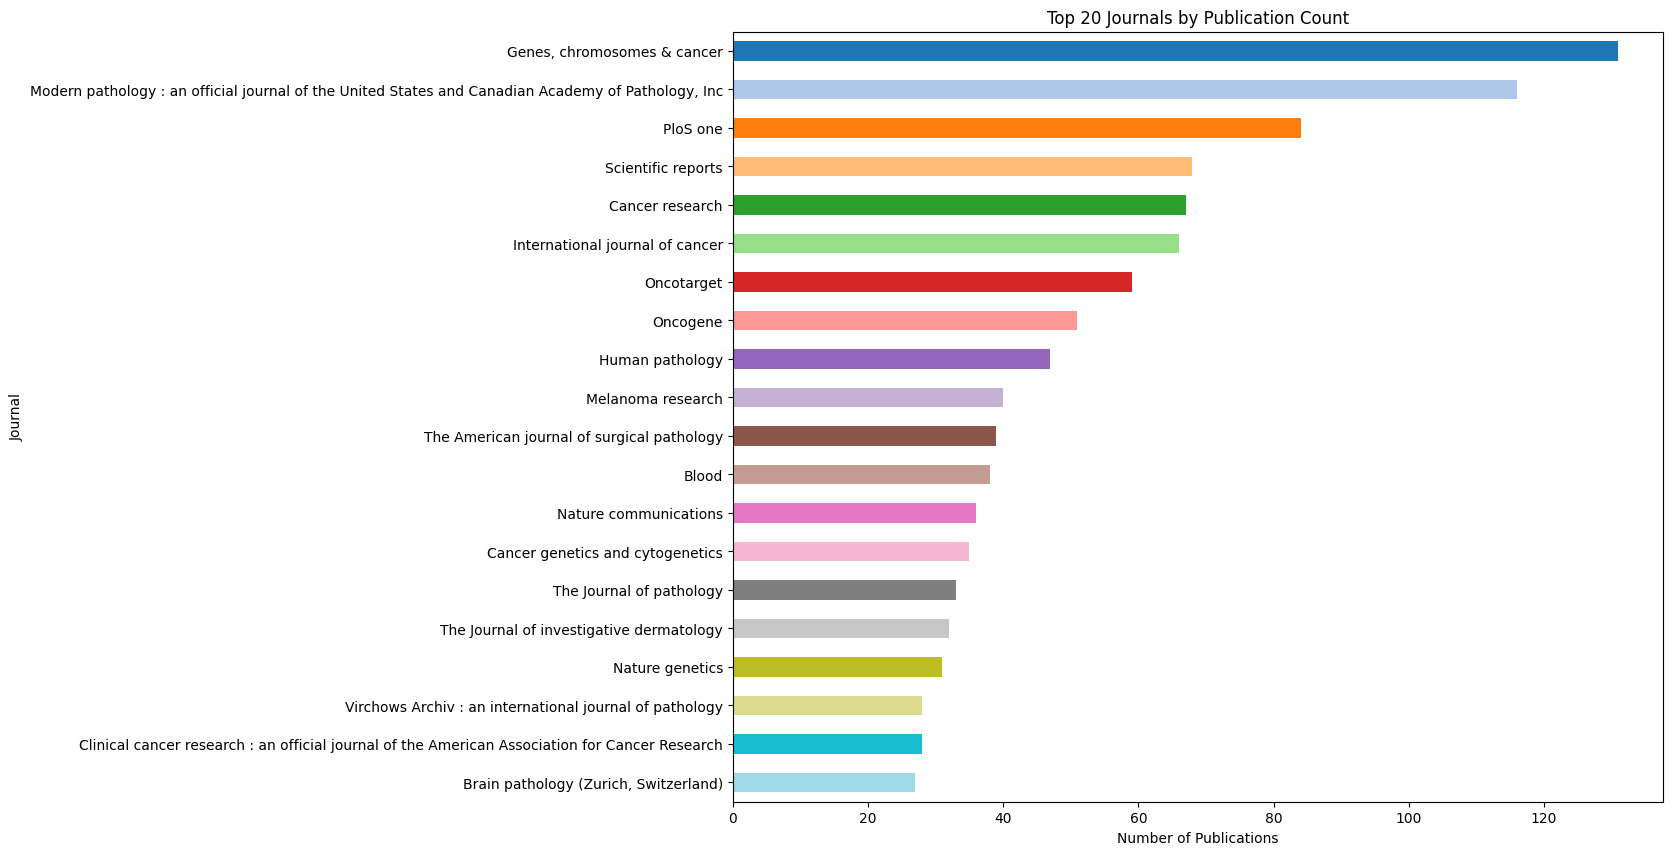

In [5]:
# Counting the number of occurrences of each journal in the 'articles' dataframe
all_journal_counts = articles['Journal'].value_counts()

# Selecting the top 20 most common journals
top_20_journals = all_journal_counts.head(20)

# Creating a horizontal bar plot with distinct colors for each bar
plt.figure(figsize=(12, 10))
colors_top_20_journals = plt.colormaps['tab20'](range(len(top_20_journals)))  # Updated method to obtain colormap
top_20_journals.plot(kind='barh', color=colors_top_20_journals)
plt.title('Top 20 Journals by Publication Count')
plt.ylabel('Journal')
plt.xlabel('Number of Publications')
plt.gca().invert_yaxis()  # Inverting the y-axis so the journal with the most publications is on top
plt.show()

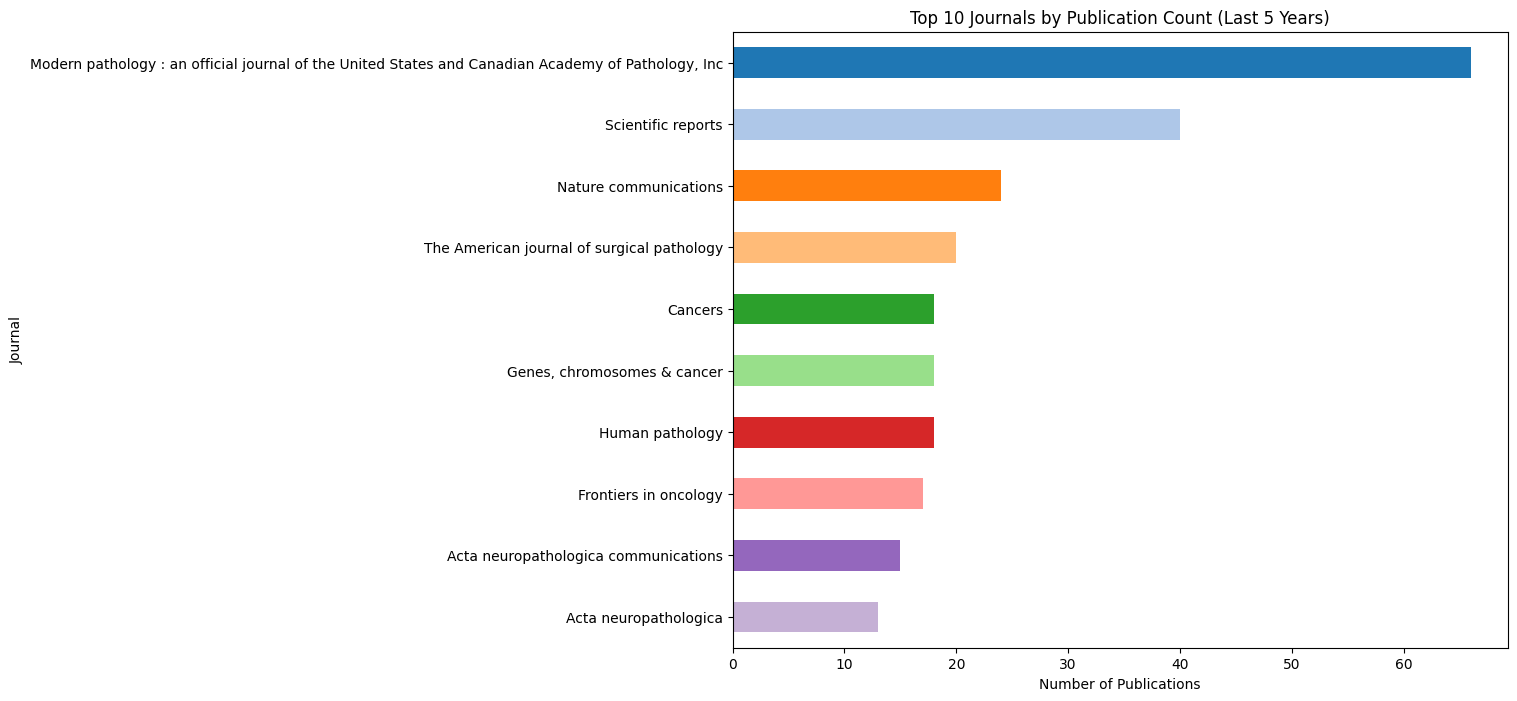

In [6]:
# Filtering the articles dataframe for the last five years (2019-2023)
recent_articles_5y = articles[articles['Year'] >= 2019]

# Counting the number of occurrences of each journal in recent articles
recent_journal_counts_5y = recent_articles_5y['Journal'].value_counts()

# Selecting the top 10 most common journals in the last five years
top_10_recent_journals_5y = recent_journal_counts_5y.head(10)

# Creating a horizontal bar plot with distinct colors for the top 10 journals
plt.figure(figsize=(10, 8))
colors_recent_articles_5y = plt.get_cmap('tab20')(range(len(top_10_recent_journals_5y)))
top_10_recent_journals_5y.plot(kind='barh', color=colors_recent_articles_5y)
plt.title('Top 10 Journals by Publication Count (Last 5 Years)')
plt.ylabel('Journal')
plt.xlabel('Number of Publications')
plt.gca().invert_yaxis()  # Inverting the y-axis so the journal with the most publications is on top
plt.show()

## **Visualization of the number of authors and article regions.**

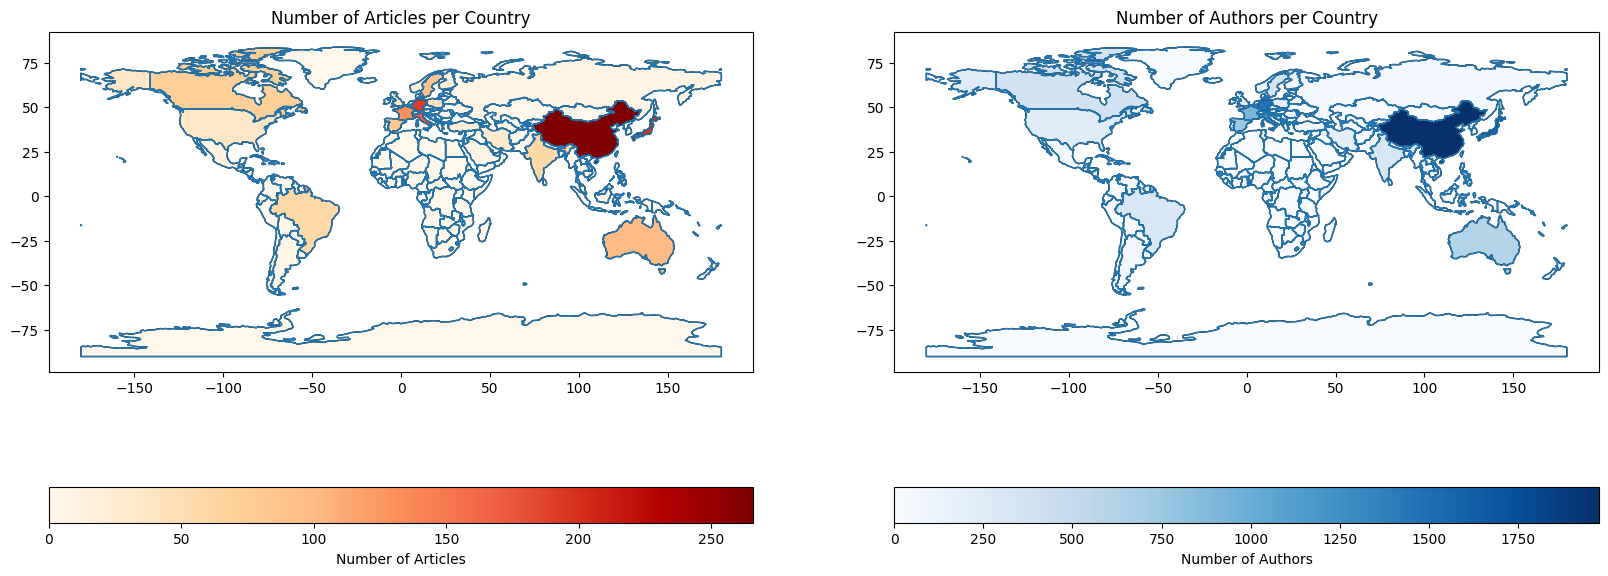

In [2]:
def extract_country(affiliation):
    """
    Extract country name from author’s affiliation information
    从作者单位信息中提取国家名。
    """
    if pd.isna(affiliation):
        return "Unknown"
    try:
        country = affiliation.split(',')[-1].strip()
        country = re.sub(r"(University|Institute|Hospital|Department|College|School).*$", "", country).strip()
        return country
    except:
        return "Unknown"

# # Define function to clean extracted country names
# 定义函数以清理提取出的国家名
def clean_country_name(country):
    """
    Clean the extracted country names
    清理提取出的国家名。
    """
    country = re.sub(r"\..*|\s\-\s.*", "", country)
    return country

# Apply function to relevant columns
# 应用函数到相关列
articles['articles_country'] = articles['FirstAuthorAffiliation'].apply(extract_country).apply(clean_country_name)
authors['authors_country'] = authors['AuthorAffiliation'].apply(extract_country).apply(clean_country_name)

# Group by country and count the number of articles and authors
# 按国家分组并计算文章和作者的数量
articles_count = articles['articles_country'].value_counts().reset_index()
articles_count.columns = ['Country', 'ArticleCount']

authors_count = authors['authors_country'].value_counts().reset_index()
authors_count.columns = ['Country', 'AuthorCount']

# Use geopandas to read the downloaded .shp file
# 使用 geopandas 读取下载的 .shp 文件
world = gpd.read_file('mapdata/ne_110m_admin_0_countries.shp')

# Merge count with world map data
# 将计数与世界地图数据合并
world = world.merge(articles_count, left_on='ADMIN', right_on='Country', how='left')
world = world.merge(authors_count, left_on='ADMIN', right_on='Country', how='left')

# Fill NaN values ​​with 0
# 用0填充NaN值
world['ArticleCount'] = world['ArticleCount'].fillna(0)
world['AuthorCount'] = world['AuthorCount'].fillna(0)

# Draw the map: number of articles and number of authors
# 绘制地图：文章数量和作者数量
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Article count map
# 文章数量地图
world.boundary.plot(ax=ax[0], linewidth=1)
world.plot(column='ArticleCount', ax=ax[0], legend=True,
           legend_kwds={'label': "Number of Articles", 'orientation': "horizontal"},
           cmap='OrRd', edgecolor='black')
ax[0].set_title('Number of Articles per Country')

# Map of number of authors
# 作者数量地图
world.boundary.plot(ax=ax[1], linewidth=1)
world.plot(column='AuthorCount', ax=ax[1], legend=True,
           legend_kwds={'label': "Number of Authors", 'orientation': "horizontal"},
           cmap='Blues', edgecolor='black')
ax[1].set_title('Number of Authors per Country')

plt.show()

In [3]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_IT', 'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA',
       'geometry', 'Country_x', 'ArticleCount', 'Country_y', 'AuthorCount'],
      dtype='object', length=173)


In [8]:
#Create a basic map
# 创建基本地图
m = folium.Map(
    location = [0, 0], # Set the map center position coordinates [latitude, longitude] # 设定地图中心位置坐标 [纬度, 经度] 
    zoom_start = 2, # Set initial zoom level # 设定初始缩放级别 
    min_zoom = 2, # Set minimum zoom level # 设定最小缩放级别 
    max_bounds = True, # Turn on the maximum boundary limit of the map # 开启地图最大边界限制
    min_lon = -180, # Set the minimum longitude value # 设定最小经度值
    max_lon = 180, # Set the maximum longitude value # 设定最大经度值
    min_lat = -90, # Set the minimum latitude value # 设定最小纬度值
    max_lat = 90 # Set the maximum latitude value # 设定最大纬度值
)

# Convert GeoDataFrame to GeoJSON
# 将 GeoDataFrame 转换为 GeoJSON
world_geojson = world.to_json()

# Add a layer using GeoJSON data
# 添加一个图层，使用 GeoJSON 数据
folium.Choropleth(
    geo_data=world_geojson,
    name='choropleth',
    data=world,
    columns=['ADMIN', 'ArticleCount'],
    key_on='feature.properties.ADMIN',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_weight=0.3,
    legend_name='Number of Articles'
).add_to(m)

# Add tooltip
# 添加工具提示
folium.GeoJson(
    world_geojson,
    name='Countries',
    tooltip=folium.GeoJsonTooltip(
        fields=['ADMIN', 'ArticleCount', 'AuthorCount'],
        aliases=['Country', 'Number of Articles', 'Number of Authors'],
        localize=True
    )
).add_to(m)

# Save map as HTML file
# 保存地图为 HTML 文件
m.save('my_map.html')

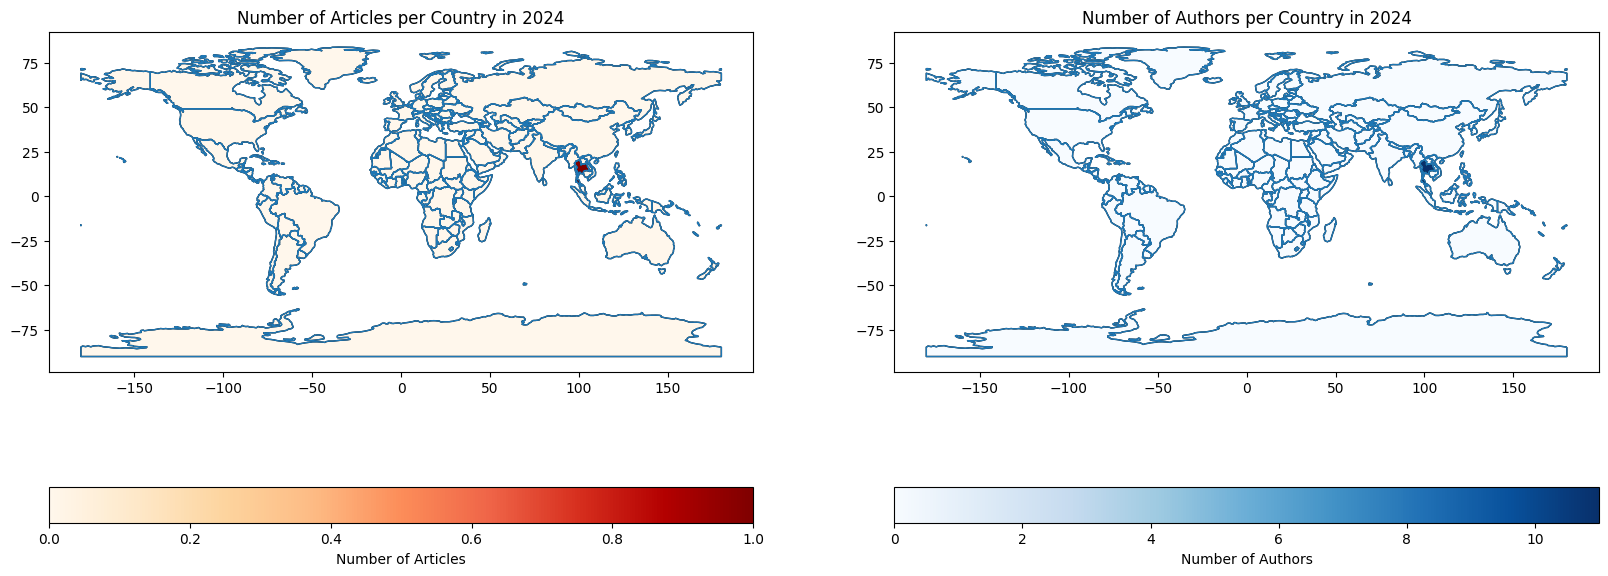

In [7]:
# Define the function for drawing the map
# 定义绘制地图的函数
def plot_maps_for_year(year, shp_file_path):
    # Filter out data for the selected year
    # 过滤出选定年份的数据
    filtered_articles = articles[articles['Year'] == year]
    filtered_authors = authors[authors['PMID'].isin(filtered_articles['PMID'])]
    
    # Group by country and count the number of articles and authors
    # 按国家分组并计算文章和作者的数量
    articles_count_r = filtered_articles['articles_country'].value_counts().reset_index()
    articles_count_r.columns = ['Country', 'ArticleCount']
    authors_count_r = filtered_authors['authors_country'].value_counts().reset_index()
    authors_count_r.columns = ['Country', 'AuthorCount']
    
    # Use geopandas to read .shp files
    # 使用 geopandas 读取 .shp 文件
    world = gpd.read_file('mapdata/ne_110m_admin_0_countries.shp')
    
    # Merge count with world map data
    # 将计数与世界地图数据合并
    world = world.merge(articles_count_r, left_on='ADMIN', right_on='Country', how='left')
    world = world.merge(authors_count_r, left_on='ADMIN', right_on='Country', how='left')
    
    # Fill NaN values ​​with 0
    # 用0填充NaN值
    world['ArticleCount'] = world['ArticleCount'].fillna(0)
    world['AuthorCount'] = world['AuthorCount'].fillna(0)
    
    # Draw the map: number of articles and number of authors
    # 绘制地图：文章数量和作者数量
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    # Article count map
    # 文章数量地图
    world.boundary.plot(ax=ax[0], linewidth=1)
    world.plot(column='ArticleCount', ax=ax[0], legend=True,
               legend_kwds={'label': "Number of Articles", 'orientation': "horizontal"},
               cmap='OrRd', edgecolor='black')
    ax[0].set_title(f'Number of Articles per Country in {year}')
    
    # Map of number of authors
    # 作者数量地图
    world.boundary.plot(ax=ax[1], linewidth=1)
    world.plot(column='AuthorCount', ax=ax[1], legend=True,
               legend_kwds={'label': "Number of Authors", 'orientation': "horizontal"},
               cmap='Blues', edgecolor='black')
    ax[1].set_title(f'Number of Authors per Country in {year}')

    plt.show()

# Get the year range
# 获取年份范围
year_range = articles['Year'].unique()
year_range.sort()

#Set the path to the .shp file
# 设置.shp文件的路径
shp_file_path = 'mapdata\ne_110m_admin_0_countries.shp'

# Automatically display data for each year in rotation
# 自动轮流显示每年的数据
for year in year_range:
    clear_output(wait=True)  # Clear old output # 清除旧的输出
    plot_maps_for_year(year, shp_file_path)
    plt.show()
    time.sleep(0.5)  # Each update interval is 0.5 seconds # 每次更新间隔0.5秒


In [8]:
# Define interactive controls to manually select years
# 定义交互式控件以手动选择年份
def interactive_map(year):
    clear_output(wait=True)
    plot_maps_for_year(year, shp_file_path)
    plt.show()

# Create an interactive slider
# 创建交互式滑块
year_slider = widgets.IntSlider(min=min(year_range), max=max(year_range), step=1, value=min(year_range))
widgets.interactive(interactive_map, year=year_slider)  

interactive(children=(IntSlider(value=1998, description='year', max=2024, min=1998), Output()), _dom_classes=(…

## **Visualization of the review papers**